- illustrates the use of netcdf and xarray 
- uses matplotlib with cartopy to plot the field



In [2]:
#import netCDF4
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from datetime import date
import pandas as pd
import os

In [3]:
dataDirectory = '/home/anant/data100/data/gridsat/data/'

2020-08-05 00:00:00
/home/anant/data100/data/gridsat/data/GRIDSAT-B1.2020.08.05.00.v02r01.nc


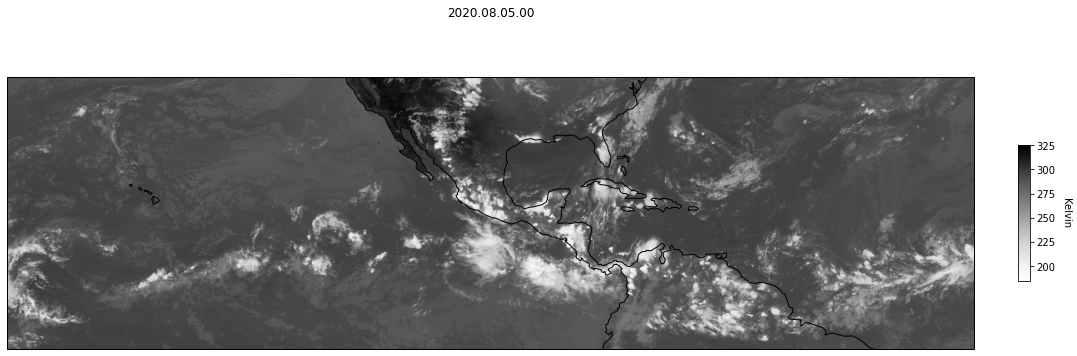

/home/anant/data100/data/gridsat/data/GRIDSAT-B1.2020.08.05.12.v02r01.nc


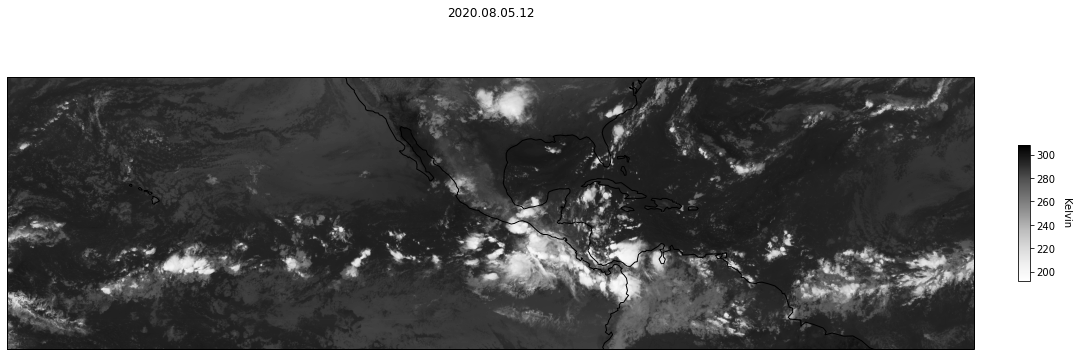

In [18]:
# edit this to change the geographic area plotted below


min_lon = -180.
max_lon = -20.
min_lat = -5.
max_lat =  40.


# set the min and max values to shade in the IR brightness temperature field
Cmin=  160
Cmax = 300


startDate = 2020080500

dateStart = pd.to_datetime(startDate, format='%Y%m%d%H')
print(dateStart)

ntimes = 2

for i in range(0, ntimes):
    #dateStart = dateStart + pd.Timedelta("12 hours")
    
    datePlot = dateStart + pd.Timedelta(days=i*.5)

    dateString = datePlot.strftime('%Y.%m.%d.%H')
                                           
    file_name = dataDirectory + "GRIDSAT-B1."  +  dateString + ".v02r01.nc"
    print(file_name)
    df = xr.open_dataset(file_name)

    irwin = df.irwin_cdr[0,:,:]

    mask_lon = (irwin.lon >= min_lon) & (irwin.lon <= max_lon)
    mask_lat = (irwin.lat >= min_lat) & (irwin.lat <= max_lat)
    irwin = irwin.where(mask_lon & mask_lat, drop=True)
    
    lats = irwin['lat'][:]
    lons = irwin['lon'][:]
    
    fig = plt.figure(figsize=(20,5))  # set figsize (width, height) here
    # set up a map

    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # drop the last row and column to be compatible with shading=flat. see documentation for pcolormesh
    #ct = plt.pcolormesh(lons, lats, irwin[:-1,:-1],cmap='Greys', rasterized=True, vmin=Cmin, vmax =Cmax, shading='flat')
    ct = plt.imshow(irwin[:-1,:-1], cmap='Greys', origin='lower', extent=[min_lon, max_lon,min_lat, max_lat])
    
    ax.coastlines()

    # create a colorbar
    cbar = plt.colorbar(ct, fraction=.08, pad=0.04, shrink=0.5, aspect=12)
    cbar.set_label('Kelvin', labelpad=15, y=.5, rotation=270)

    plt.title(dateString, y=1.2)
    plt.show()


print (irwin.min().values, irwin.max().values)


lats = irwin['lat'][:]
lons = irwin['lon'][:]



2020-08-05 00:00:00
/home/anant/data100/data/gridsat/data/GRIDSAT-B1.2020.08.05.00.v02r01.nc


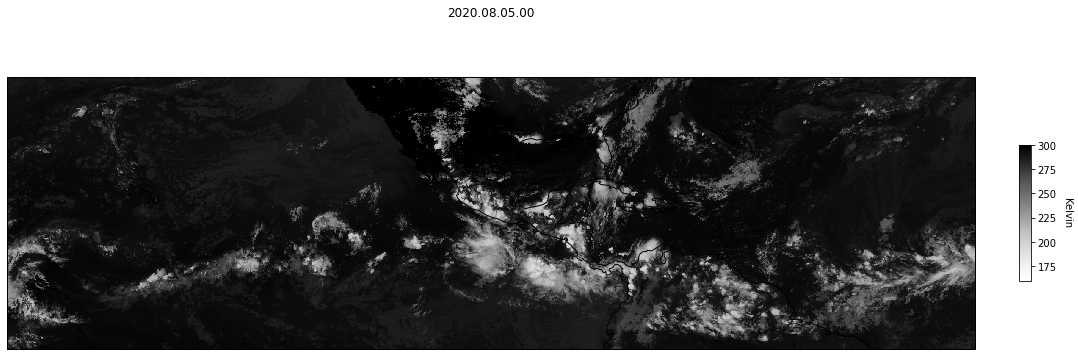

/home/anant/data100/data/gridsat/data/GRIDSAT-B1.2020.08.05.12.v02r01.nc


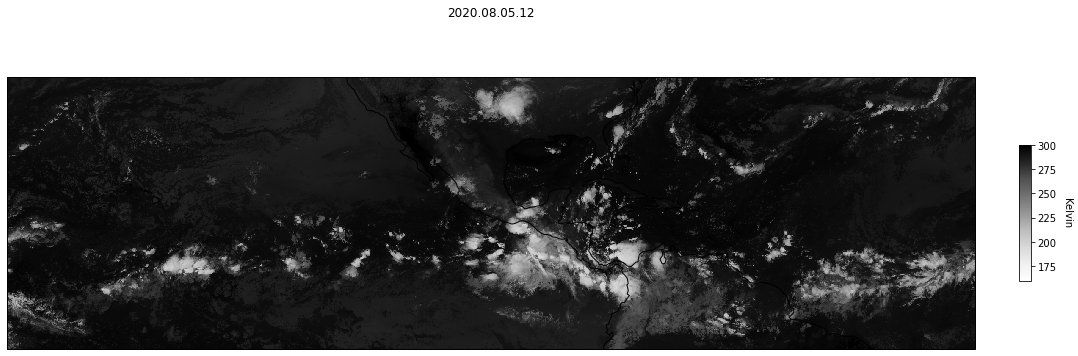

In [13]:
# edit this to change the geographic area plotted below


min_lon = -180.
max_lon = -20.
min_lat = -5.
max_lat =  40.


# set the min and max values to shade in the IR brightness temperature field
Cmin=  160
Cmax = 300


startDate = 2020080500

dateStart = pd.to_datetime(startDate, format='%Y%m%d%H')
print(dateStart)

ntimes = 2

for i in range(0, ntimes):
    #dateStart = dateStart + pd.Timedelta("12 hours")
    
    datePlot = dateStart + pd.Timedelta(days=i*.5)

    dateString = datePlot.strftime('%Y.%m.%d.%H')
                                           
    file_name = dataDirectory + "GRIDSAT-B1."  +  dateString + ".v02r01.nc"
    print(file_name)
    df = xr.open_dataset(file_name)

    irwin = df.irwin_cdr[0,:,:]

    mask_lon = (irwin.lon >= min_lon) & (irwin.lon <= max_lon)
    mask_lat = (irwin.lat >= min_lat) & (irwin.lat <= max_lat)
    irwin = irwin.where(mask_lon & mask_lat, drop=True)
    
    lats = irwin['lat'][:]
    lons = irwin['lon'][:]
    fig = plt.figure(figsize=(20,5))  # set figsize (width, height) here
    # set up a map

    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # drop the last row and column to be compatible with shading=flat. see documentation for pcolormesh
    ct = plt.pcolormesh(lons, lats, irwin[:-1,:-1],cmap='Greys', rasterized=True, vmin=Cmin, vmax =Cmax, shading='flat')
    
    ax.coastlines()

    # create a colorbar
    cbar = plt.colorbar(ct, fraction=.08, pad=0.04, shrink=0.5, aspect=12)
    cbar.set_label('Kelvin', labelpad=15, y=.5, rotation=270)

    plt.title(dateString, y=1.2)
    plt.show()
